In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитайте csv файл (використовуйте функцію read_csv)

In [3]:
df = pd.read_csv("bestsellers with categories.csv")

Виведіть перші п'ять рядків (використовується функція head)

In [4]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
df.shape

(550, 7)

Про яку кількість книг зберігає дані датасет? Відповідь: 550

ПЕРВИННЕ ДОСЛІДЖЕННЯ ДАНИХ
--------------------------------

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.tail(1)

,name,author,user_rating,reviews,price,year,genre
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [7]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні) Відповідь: Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [8]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь: 'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

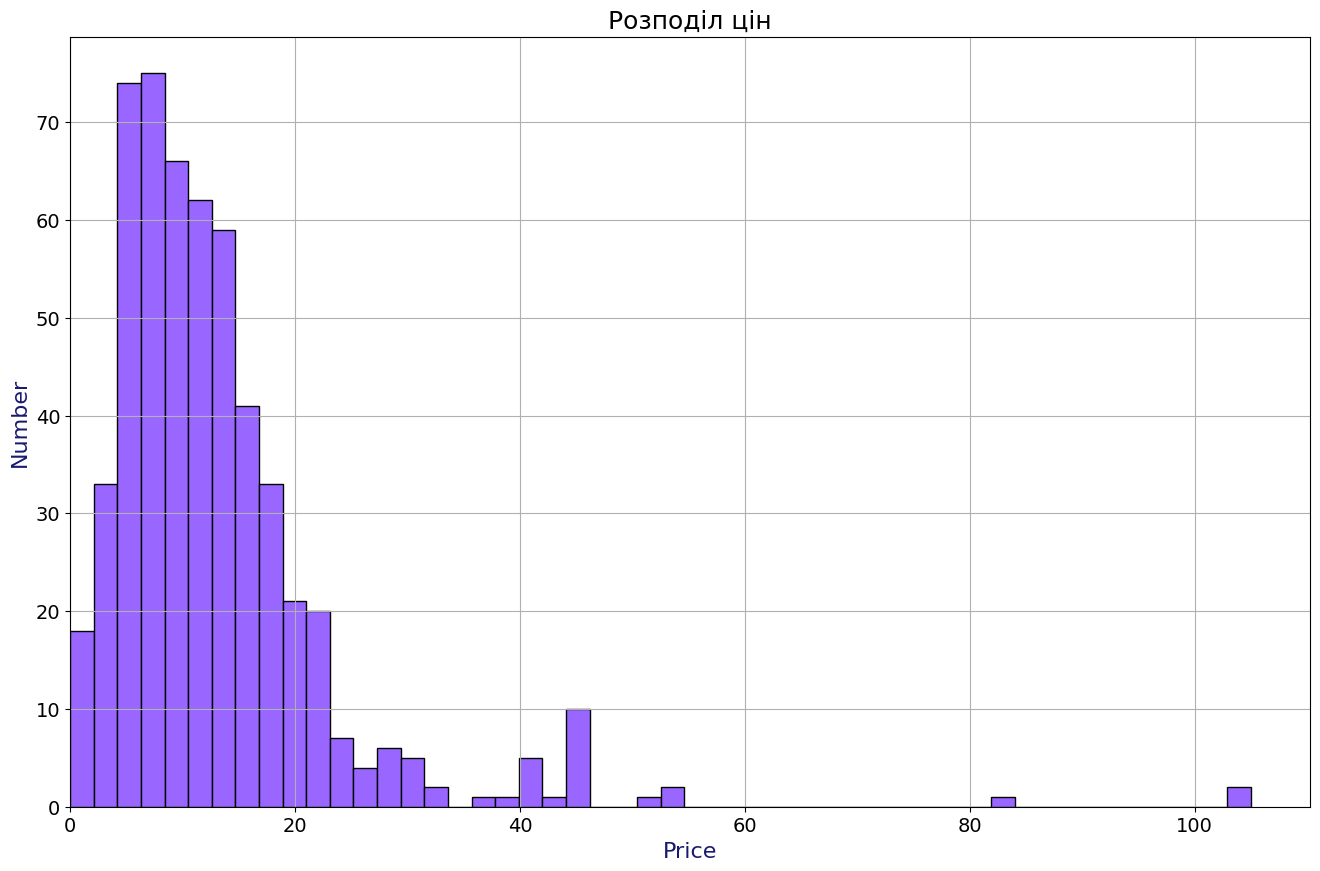

In [11]:
fig = plt.subplots(figsize=(16, 10))
df.price.plot(kind='hist', fontsize=14,
              grid=True, bins=50, color=['#9966FF'], edgecolor='black')
plt.title("Розподіл цін", fontdict = {'fontsize' : 18})
plt.xlabel("Price", size=16, color="midnightblue")
plt.ylabel("Number", size=16, color="midnightblue")
plt.xlim(0,)
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [12]:
df.agg({"price": ["max", "min", "mean", "median"]})

,price
max,105.0
min,0.0
mean,13.1
median,11.0


Максимальна ціна? Відповідь: 105

Мінімальна ціна? Відповідь: 0

Середня ціна? Відповідь: 13.1

Медіанна ціна? Відповідь: 11

ПОШУК ТА СОРТУВАННЯ ДАНИХ:

Який рейтинг у датасеті найвищий? 

In [13]:
df.agg({"user_rating": ["max"]})

,user_rating
max,4.9


Відповідь: 4.9


Скільки книг мають такий рейтинг? 

In [14]:
df.query('user_rating == 4.9')["user_rating"].count()


52

Відповідь: 52

Яка книга має найбільше відгуків?

In [15]:
max_rev = df["reviews"].agg(["max"])
df.query("reviews == @max_rev.values[0]")

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Відповідь: Where the Crawdads Sing

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 

In [16]:
pr_df = df.query("year == 2015")
max_prc= pr_df["price"].agg(["max"])
pr_df.query("price == @max_prc.values[0]")

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Відповідь: Publication Manual of the American Psychologic...

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [17]:
df.query("year == 2010 & genre == 'Fiction'")["name"].count()

20

Відповідь: 20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 

In [18]:
pr_df = df.query("year == 2010 | year == 2011")
pr_df.query("user_rating == 4.9")["name"].count()

1

Відповідь: 1

Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [19]:

pr_df = df.query("year == 2015 & price <= 8").sort_values("price")
pr_df


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


Яка книга остання у відсортованому списку? 

In [20]:
pr_df.tail(1)["name"]

191    Jesus Calling: Enjoying Peace in His Presence ...
Name: name, dtype: object

Відповідь: Jesus Calling: Enjoying Peace in His Presence ...

АГРЕГУВАННЯ ТА З'ДНАННЯ ТАБЛИЦЬ
--------------------------------

Подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [21]:
pr_df = df.groupby("genre").agg({"price": ["max", "min"]})
pr_df

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0



Максимальна ціна для жанру Fiction: Відповідь: 82

Мінімальна ціна для жанру Fiction: Відповідь: 0

Максимальна ціна для жанру Non Fiction: Відповідь: 105

Мінімальна ціна для жанру Non Fiction: Відповідь: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [22]:

aut_df = df.groupby("author")["name"].agg(["count"])
aut_df


,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця?

In [23]:
aut_df.shape

(248, 1)

Відповідь: (248, 1)

Який автор має найбільше книг? 

In [24]:
max_c = aut_df["count"].max()
aut_df.query("count == @max_c")

,count
author,
Jeff Kinney,12


Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [25]:
rat_df = df.groupby("author")["user_rating"].agg(["mean"])
rat_df

,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


У якого автора середній рейтинг мінімальний?

In [26]:
min_r = rat_df["mean"].min()
rat_df.query("mean == @min_r")

,mean
author,
Donna Tartt,3.9


Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [27]:
df_new = pd.concat([aut_df, rat_df], axis=1)
df_new = df_new.rename(columns={"count": "book_count", "mean": "average_rating"})
df_new

,book_count,average_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [28]:
df_new = df_new.sort_values(["book_count", "average_rating"])
df_new.head(5)

,book_count,average_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


Який автор перший у списку?

In [29]:
df_new.head(1)

,book_count,average_rating
author,,
Muriel Barbery,1,4.0


Відповідь: Muriel Barbery

ВІЗУАЛІЗАЦІЯ

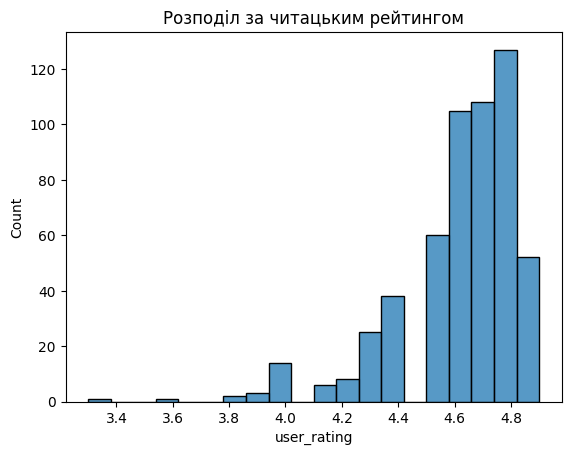

In [32]:
sns.histplot(data=df, x="user_rating", bins=20)
plt.title("Розподіл за читацьким рейтингом")
plt.show()

Text(0, 0.5, 'Ціна')

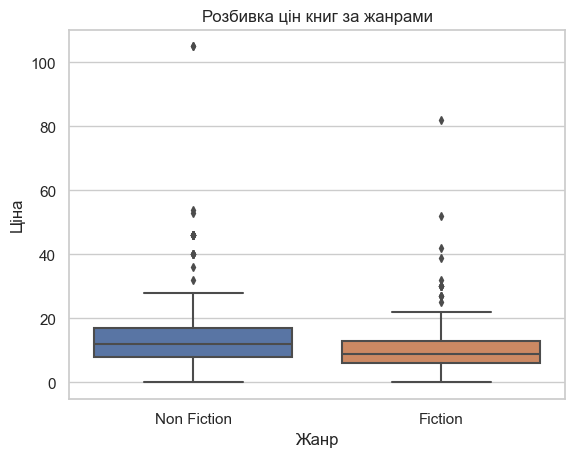

In [33]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="genre", y="price", data=df, fliersize=4)
ax.set_title("Розбивка цін книг за жанрами")
ax.set_xlabel("Жанр")
ax.set_ylabel("Ціна")

Розбивка кількості відгуків (Reviews) за жанрами (Genre) та роками (Year)


<Axes: xlabel='genre', ylabel='year'>

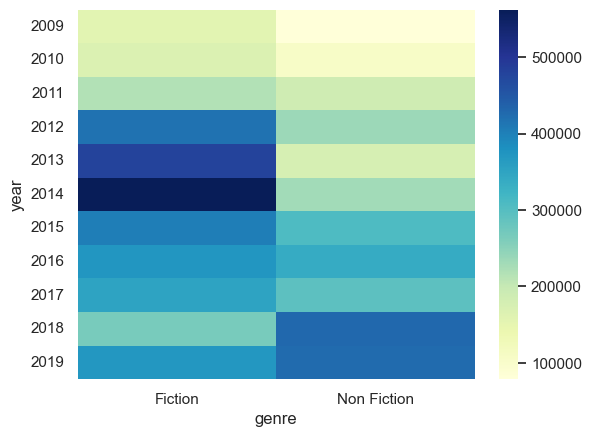

In [35]:
# Розділяємо датасет на фіксований рік та кількість відгуків
df_reviews = df[["year", "genre", "reviews"]]

# Виконуємо агрегацію за жанрами та роками
df_reviews = df_reviews.groupby(["year", "genre"]).sum()

# Перетворюємо таблицю у форматі long
df_reviews = df_reviews.reset_index()
df_reviews = df_reviews.pivot(index="year", columns="genre", values="reviews")


# Побудова теплової карти
sns.heatmap(df_reviews, cmap="YlGnBu")